In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten, MaxPooling2D, Dropout
import os
import pandas as pd
import numpy as np
import mat

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
train_dir='images/train'
test_dir='images/test'

In [4]:
def createdataframe(dir):
    labels=[]
    image_paths=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [5]:
pip install tqdm

In [6]:
from tqdm.notebook import tqdm

In [7]:
train=pd.DataFrame()
train['image'],train['label']=createdataframe(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)
print(train['image'])

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]
0              images/train\angry\0.jpg
1              images/train\angry\1.jpg
2             images/train\angry\10.jpg
3          images/train\angry\10002.jpg
4          images/train\angry\10016.jpg
                      ...              
28816    images/train\surprise\9969.jpg
28817    images/train\surprise\9985.jpg
28818    images/train\surprise\9990.jpg
28819    images/train\surprise\9992.jp

In [9]:
test=pd.DataFrame()
test['image'],test['label']=createdataframe(test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [11]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [13]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image, grayscale=True)
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features
    

In [14]:
train_features=extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\ADMIN\.conda\envs\tf-new\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [15]:
test_features=extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [16]:
x_train=train_features/255.0
x_test=test_features/255.0

In [17]:
pip install -U scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [20]:
y_train=le.transform(train['label'])

y_test=le.transform(test['label'])

In [21]:
y_train=to_categorical(y_train, num_classes=7)
y_test=to_categorical(y_test, num_classes=7)

In [22]:
pip install Maxpooling2D 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Maxpooling2D (from versions: none)
ERROR: No matching distribution found for Maxpooling2D


In [23]:
pip install Dropout

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Dropout (from versions: none)
ERROR: No matching distribution found for Dropout


In [25]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [27]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 254s 1s/step - loss: 1.8244 - accuracy: 0.2444 - val_loss: 1.8115 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 282s 1s/step - loss: 1.8110 - accuracy: 0.2491 - val_loss: 1.7898 - val_accuracy: 0.2569
Epoch 3/100
226/226 [==============================] - 275s 1s/step - loss: 1.7785 - accuracy: 0.2600 - val_loss: 1.7083 - val_accuracy: 0.3190
Epoch 4/100
226/226 [==============================] - 256s 1s/step - loss: 1.6875 - accuracy: 0.3177 - val_loss: 1.6339 - val_accuracy: 0.3507
Epoch 5/100
226/226 [==============================] - 255s 1s/step - loss: 1.5661 - accuracy: 0.3831 - val_loss: 1.4353 - val_accuracy: 0.4465
Epoch 6/100
226/226 [==============================] - 256s 1s/step - loss: 1.4832 - accuracy: 0.4227 - val_loss: 1.3792 - val_accuracy: 0.4650
Epoch 7/100
226/226 [==============================] - 254s 1s/step - loss: 1.4327 - accuracy: 0.4441 - val_loss: 1.3331 - val_accuracy:

226/226 [==============================] - 253s 1s/step - loss: 0.9378 - accuracy: 0.6507 - val_loss: 1.0360 - val_accuracy: 0.6234
Epoch 58/100
226/226 [==============================] - 293s 1s/step - loss: 0.9286 - accuracy: 0.6513 - val_loss: 1.0372 - val_accuracy: 0.6170
Epoch 59/100
226/226 [==============================] - 502s 2s/step - loss: 0.9295 - accuracy: 0.6522 - val_loss: 1.0285 - val_accuracy: 0.6245
Epoch 60/100
226/226 [==============================] - 258s 1s/step - loss: 0.9250 - accuracy: 0.6559 - val_loss: 1.0287 - val_accuracy: 0.6217
Epoch 61/100
226/226 [==============================] - 518s 2s/step - loss: 0.9152 - accuracy: 0.6588 - val_loss: 1.0283 - val_accuracy: 0.6187
Epoch 62/100
226/226 [==============================] - 265s 1s/step - loss: 0.9130 - accuracy: 0.6631 - val_loss: 1.0237 - val_accuracy: 0.6264
Epoch 63/100
226/226 [==============================] - 280s 1s/step - loss: 0.9083 - accuracy: 0.6621 - val_loss: 1.0297 - val_accuracy: 0.625

In [28]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [29]:
from keras.models import model_from_json

In [31]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [32]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [33]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [41]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 94ms/step
model prediction is  sad


In [36]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/01/50/0d8d8f044e2a0d8151e9ed59fe50924e9e697ba43a8b12d5ff9b45adb871/matplotlib-3.8.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/87/2b/9b49451f7412cc1a79198e94a771a4e52d65c479aae610b1161c0290ef2c/contourpy-1.1.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/39/85/43a6d535a7cb021a673f5451f49c8f034217d58a83ab813e374bfe564ccb/fonttools-4.43.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------- ----------------------------- 30.7/155.5 kB 660.6 kB/s eta 0:0

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 79ms/step
model prediction is  sad


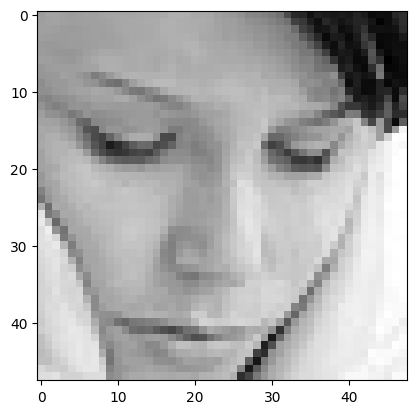

In [42]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 78ms/step
model prediction is  fear


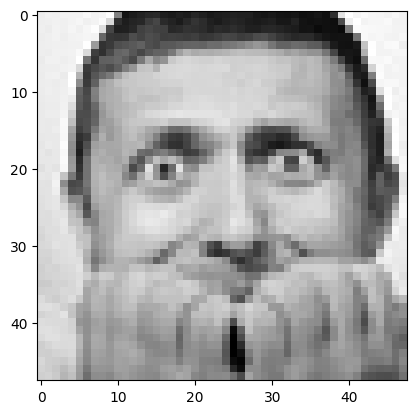

In [45]:
image = 'images/train/fear/300.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 79ms/step
model prediction is  disgust


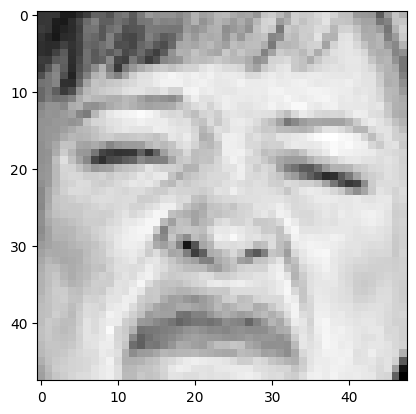

In [47]:
image = 'images/train/disgust/4805.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 78ms/step
model prediction is  happy


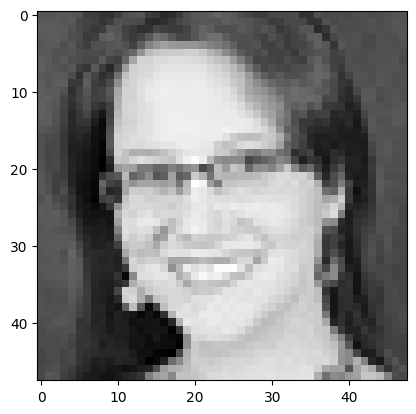

In [48]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 79ms/step
model prediction is  surprise


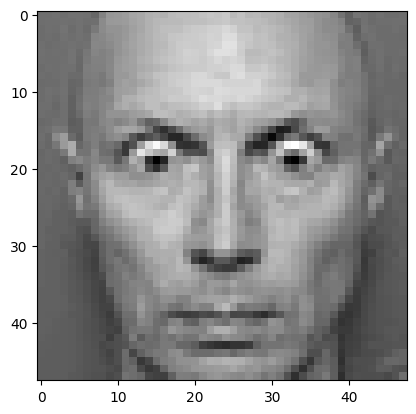

In [49]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')